In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2

Train: X= (50000, 32, 32, 3) y= (50000, 1)
Test: X= (10000, 32, 32, 3) y= (10000, 1)


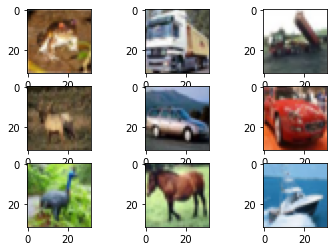

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# summary 
print("Train:" , "X=", trainX.shape, "y=",  trainY.shape)
print("Test:" , "X=", testX.shape, "y=", testY.shape)

# plot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(trainX[i])
pyplot.show()

>  66.189998


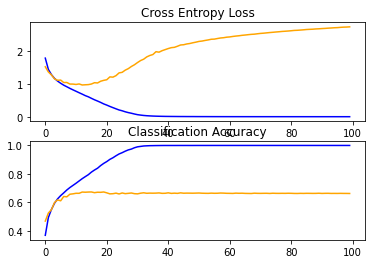

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  # covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_VGG1():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model 
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model 

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  
# run show 
def run_show():
  # load 
  trainX, trainY, testX, testY = load_dataset()
  # scale 
  trainX, testX = prep_pixels(trainX, testX)
  # model 
  model = define_model_VGG1()
  # fit  
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)  
  # evaluate  
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)

# run the show 
run_show()

>  71.780002


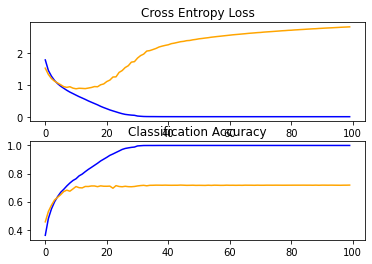

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  #covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_VGG2():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model 
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model 

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

# run show 
def run_show_2():
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  # scale pixels
  trainX, testX = prep_pixels(trainX, testX)
  # define model 
  model = define_model_VGG2()
  # fit model 
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)  
  # evaluate model 
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)

# run the show 
run_show_2()

>  73.740000


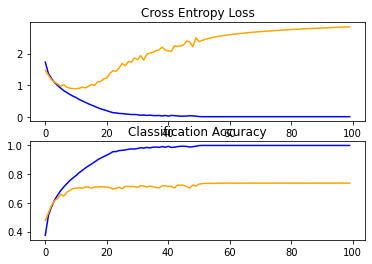

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  #covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_VGG3():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model 
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model 

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


# run show 
def run_show_3():
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  # scale pixels
  trainX, testX = prep_pixels(trainX, testX)
  # define model 
  model = define_model_VGG3()
  # fit model 
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)  
  # evaluate model 
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)

# run the show 
run_show_3()

In [ ]:
import time

## **DROPOUT**

>  82.410002
runtime>  -448.0383405685425


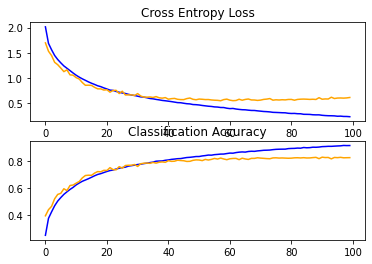

In [ ]:
# MODEL WITH DROPOUT 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  #covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_4():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


# run show 
def run_show_4():
  # start time
  begin = time.time()
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  # scale pixels
  trainX, testX = prep_pixels(trainX, testX)
  # define model 
  model = define_model_4()
  # fit model 
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)  
  # evaluate model 
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)
  # end time 
  end = time.time()
  # runtime 
  runtime = begin - end
  print("runtime> ", runtime)

# run the show 
run_show_4()


### WEIGHT DECAY

>>>  74.330002
runtime>>> 470.4876003265381  seconds


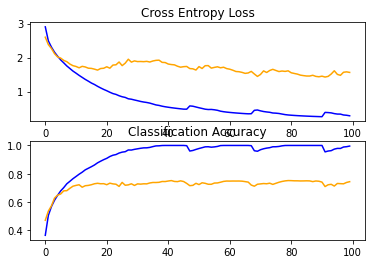

In [ ]:
# MODEL WITH DROPOUT 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  #covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_5():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


# run show 
def run_show_5():
  # start time
  begin = time.time()
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  # scale pixels
  trainX, testX = prep_pixels(trainX, testX)
  # define model 
  model = define_model_5()
  # fit model 
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)  
  # evaluate model 
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('>>> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)
  # end time 
  end = time.time()
  # runtime 
  runtime = end - begin
  print("runtime>>>", runtime,' seconds')

# run the show 
run_show_5()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**DATA AUGMENTATION**

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode Y
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels 
def prep_pixels(train, test):
  #covert to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized  
  return train_norm, test_norm

# define cnn model 
def define_model_6():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot results
def plot_results(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title("Cross Entropy Loss")
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title("Classification Accuracy")
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


# run show 
def run_show_6():
  # start time
  begin = time.time()
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  # scale pixels
  trainX, testX = prep_pixels(trainX, testX)
  # define model 
  model = define_model_6()
  # data augmentation
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  # iterator
  it_train = datagen.flow(trainX, trainY, batch_size=64)
  # fit model 
  steps = int(trainX.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)  
  # evaluate model 
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('>>> % 3f' % (acc * 100))
  # learning curves
  plot_results(history)
  # end time 
  end = time.time()
  # runtime 
  runtime = end - begin
  print("runtime>>>", runtime,' seconds')

# run the show 
run_show_6()